In [138]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import requests
from faker import Faker
import ujson as json
import pandas as pd
import requests
from numpy import random 
from elasticsearch import Elasticsearch
from elasticsearch import helpers
from elasticsearch_dsl import Search, DocType, Date, Integer, Keyword, Text
from datetime import datetime
from elasticsearch_dsl.connections import connections
import requests
from random import randint
from pandas.io.json import json_normalize

ES_HOST = 'http://ec2-34-205-15-150.compute-1.amazonaws.com:9200'
INDEX = "eda1"
DOC_TYPE="user"
es = Elasticsearch(ES_HOST)

# Exploratory data analysis (EDA) 
It is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

##### Key Concepts

- Displaying data 
- Displaying distributions 
- Displaying info about the variables

##### There are 4 focal point. These are:

- measures of central tendency, i.e. the mean, the media and mode,
- measures of spread, i.e. variability, variants and standard deviation,
- the shape of the distribution, and
- the existence of outliers.

##### Types of data
- discrete (Number of orders customers have done)
- continuous (Total Revenue of Customers)
- categorical-nominal (RFM Score, Customer Status)
- Categorical-ordinal  (City)
- binary (Email Unsubscribed - Yes/No)




#####  Important Question to ask?
- What type of variation occurs within my variables?
- What type of covariation occurs between my variables?
- Which are response(dependednt) and predictor(independent) variables? 
- What are some obvious mistakes in data (recording errors etc)?
- What are some visible patterns in the data?
- Is there any violations of statistical assumptions?
- Can I generate some hypotheses?



##### Types of Variables and suggested EDA techinques

| Quantitative Variables                                                                             | Categorical  Variables                  | Quantitative &  Categorical                                                                                           |
|----------------------------------------------------------------------------------------------------|-----------------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| - Interval variables - Ratio variables                                                             | - Ordinal Variables - Nominal Variables |                                                                                                                       |
| 1. Univariate(one variable) - Histograms  - Boxplots, - Stem & Leaf Plots - Quantile Normal Plots  | 1 variable:  Pie charts, Bar graphs     |                                                                                                                       |
| 2. Bivariate (two variables) - Scatterplots                                                        | 2 or more: Facetted PieCharts           | Bivariate  Line Graph, Bar Graph                                                                                      |
| 3 Three Variables -  Bubble Chart                                                                  |                                         | 2. One Categorical & 2 Quantitative  - Facetted Scatter Two Categorical & 1 Quantitative - Facetted Line or Barcharts |

#  Discrete Uniform distribution
A random variable X has a discrete uniform distribution if each of the n values in its range: x1,x2,x3....xn has equal probability

Below 4 graphs shows a single dice rolls, and we can see as number of rolls increases, the frequencies tends to be same. 
So we can say a uniform distribution in which all values have the same frequency.



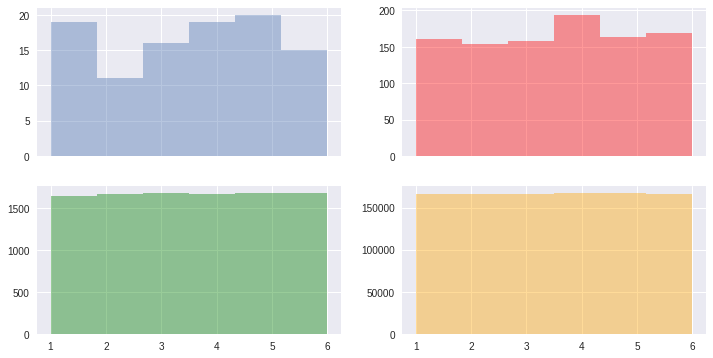

In [77]:
f, axes = plt.subplots(2,2, figsize=(12,6), sharex=True)
f1 = sns.distplot(np.random.randint(1, 7, 100 ), bins=6, kde=False, ax = axes[0,0])
f2 = sns.distplot(np.random.randint(1, 7, 1000 ),bins=6, kde=False, color='red',ax = axes[0,1])
f3 = sns.distplot(np.random.randint(1, 7, 10000 ),bins=6, kde=False, color='green', ax = axes[1,0])
f4 = sns.distplot(np.random.randint(1, 7, 1000000 ),bins=6, kde=False, color='orange', ax = axes[1,1])

### Probability mass function (PMF)
a representation of a distribution as a function that maps from values to probabilities.

$f(x_i) = \dfrac{1}{n}$

for Discrete Uniform function

- PMF uses discrete random variables.
- PDF uses continuous random variables.

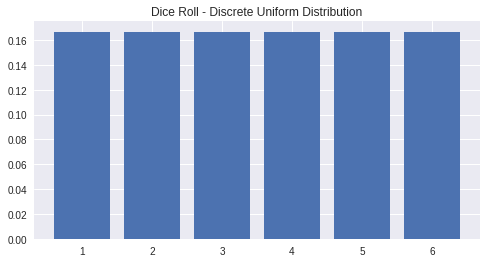

In [102]:
roll_options = [1,2,3,4,5,6]
#since index starts at 0
high_value = 7 
low_value = 1

plt.bar(roll_options,stats.randint.pmf(roll_options,low_value,high_value))
plt.title('Dice Roll - Discrete Uniform Distribution')
plt.show()


# Continuous Uniform Distribution

A continuous distribution is appropriate when the variable can take on (at least in theory) an infinite number of values. You can weigh 150.2311 kgs or 150.1012 kgs. 
- Continuous distributions cannot be written so neatly as the uniform discrete distribution,
- As a result, a continuous probability distribution cannot be expressed in tabular form.
- Instead, an equation or formula is used to describe a continuous probability distribution.

A continous random variable X with a probability density function is a continous uniform random variable when:
$f(x)=1(b−a)$ <br> $a<=x<=b$

Let's say a session that ends in a purchase is on avergae 25 mins long. After taking some time measurements from experiments we gather that all the purchase sessiosns are **uniformly distributed** between 19 and 37 minutes.
What is the probability density function of a purchase session, or f(x)?

In [126]:
b= 37
a = 19
fx = 1.0/(b-a)

#show 
print('The probability density function results in {:.4f}'.format(fx))

The probability density function results in 0.0556


In [129]:
#So let's ask the question, what's the probability that the session length will last 
# at least 25 minutes?

#f(27)
fx_1 = 27.0/(b-a)
#f(25)
fx_2 = 25.0/(b-a)

#Our answer is then
ans = fx_1-fx_2

#print
print (' The probability that the session will last at least 25 minutes is {:.1f} %'.format(100*ans))

 The probability that the session will last at least 25 minutes is 11.1 %


## Histograms
- Learn how to summarize quantitative data graphically using a histogram.
- Learn how to construct histograms for discrete data.
- Learn how to construct histograms for continuous data.
- Learn the distinction between frequency histograms, relative frequency histograms, and density histograms.